In [ ]:
!apt-get -qq install awscli
!aws --no-sign-request s3 cp s3://acoustic-sandbox/labeled-data/detection/train/OrcasoundLab07052019_PodCastRound2.tar.gz ./ 
!aws --no-sign-request s3 cp s3://acoustic-sandbox/labeled-data/detection/train/OrcasoundLab09272017_PodCastRound3.tar.gz ./
!aws --no-sign-request s3 cp s3://acoustic-sandbox/labeled-data/detection/test/OrcasoundLab09272017_Test.tar.gz ./
!tar -xzf OrcasoundLab09272017_PodCastRound3.tar.gz
!tar -xzf OrcasoundLab07052019_PodCastRound2.tar.gz
!tar -xzf OrcasoundLab09272017_Test.tar.gz
!pip -q install pysoundfile
!pip install pydub


Extracting templates from packages: 100%
Selecting previously unselected package fonts-droid-fallback.
(Reading database ... 144579 files and directories currently installed.)
Preparing to unpack .../00-fonts-droid-fallback_1%3a6.0.1r16-1.1_all.deb ...
Unpacking fonts-droid-fallback (1:6.0.1r16-1.1) ...
Selecting previously unselected package liblqr-1-0:amd64.
Preparing to unpack .../01-liblqr-1-0_0.4.2-2.1_amd64.deb ...
Unpacking liblqr-1-0:amd64 (0.4.2-2.1) ...
Selecting previously unselected package imagemagick-6-common.
Preparing to unpack .../02-imagemagick-6-common_8%3a6.9.7.4+dfsg-16ubuntu6.8_all.deb ...
Unpacking imagemagick-6-common (8:6.9.7.4+dfsg-16ubuntu6.8) ...
Selecting previously unselected package libmagickcore-6.q16-3:amd64.
Preparing to unpack .../03-libmagickcore-6.q16-3_8%3a6.9.7.4+dfsg-16ubuntu6.8_amd64.deb ...
Unpacking libmagickcore-6.q16-3:amd64 (8:6.9.7.4+dfsg-16ubuntu6.8) ...
Selecting previously unselected package libmagickwand-6.q16-3:amd64.
Preparing to unp

In [ ]:
!git clone "https://github.com/orcasound/orcaal-research"

Cloning into 'orcaal-research'...
remote: Enumerating objects: 219, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (211/211), done.
remote: Total 488 (delta 127), reused 0 (delta 0), pack-reused 269
Receiving objects: 100% (488/488), 25.99 MiB | 39.26 MiB/s, done.
Resolving deltas: 100% (229/229), done.


In [ ]:
!python /content/orcaal-research/src/preprocessing_script/preprocess.py --tsv_path /content/podcast2.tsv --call_time 3 --files_dir /content/Round2_OS_07_05/wav --output_dir /content/output1 --melspectrogram --pcen --wavelet

/usr/local/lib/python3.6/dist-packages/numba/errors.py:137: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)
The mean of the call duration is 2.1110548004254963


In [ ]:
!python /content/orcaal-research/src/preprocessing_script/preprocess.py --tsv_path /content/podcast3.tsv --call_time 3 --files_dir /content/Round3_OS_09_27_2017/wav --output_dir /content/output2 --melspectrogram --pcen --wavelet

/usr/local/lib/python3.6/dist-packages/numba/errors.py:137: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)
The mean of the call duration is 1.9741213114468479


In [ ]:
import cv2
pop=cv2.imread("/content/output1/positive_plots/extracted_calls101_0000.png")
pop.shape

(614, 623, 3)

In [ ]:
import os

In [ ]:
%cd /content/output2/positive_plots

/content/output2/positive_plots


In [ ]:
for filename in os.listdir("/content/output2/positive_plots/"):
    os.rename(filename, filename[9:])


In [ ]:
%cd /content/output2/negative_plots/

/content/output2/negative_plots


In [ ]:
for filename in os.listdir("/content/output2/negative_plots/"):
    os.rename(filename, filename[10:])


In [ ]:
for filename in os.listdir("/content/output2/negative_plots/"):
        shutil.move(os.path.join("/content/output2/negative_plots/", filename), "/content/output1/negative_plots/")

In [ ]:
import shutil

In [ ]:
for filename in os.listdir("/content/output2/positive_plots/"):
        shutil.move(os.path.join("/content/output2/positive_plots/", filename), "/content/output1/positive_plots/")

In [ ]:
nb_samples = sum(len(files) for _, _, files in os.walk("/content/output1"))

In [ ]:
nb_samples

1572

In [ ]:
cd /content/aud_zip/

/content/aud_zip


In [ ]:
!unzip "/content/aud_zip/boat_wav.zip"

Archive:  /content/aud_zip/boat_wav.zip
  inflating: 06-061030_squeaky_ship-LK.wav  
  inflating: calibration-listening-171028_5023-5053_30s_goes_behind_henry.wav  
  inflating: 081008_1030-ship-moderate-1min.wav  
  inflating: calibration-listening-171028-10sCPA.wav  
  inflating: calibration-listening-171028_5023-5053_30s_goes_behind_henry_2.wav  
  inflating: 120520_235725-ship.wav  
  inflating: calibration-listening-171028-10sCPA_2.wav  
  inflating: ferry-haroCPA.wav       
  inflating: ferry-squeak.wav        
  inflating: fishing.wav             
  inflating: montecito-approaching.wav  
  inflating: montecito-cpa-saturated.wav  
  inflating: montecito-departing.wav  
  inflating: squeaky-ship.wav        
  inflating: speedboat.wav           
  inflating: ship-clackety.wav       


In [ ]:

def extract_audio(
        output_directory,
        file_location,
        call_time_in_seconds,
        call_annotations
):
    """This function extracts the audio of a specified duration.

    Since a single audio clip might consist of a mixture of both calls
    and no calls, therefore smaller audio clips of particular time frame
    are extracted to get the complete positive and negative calls.These
    calls are extracted by taking the start-time from the .tsv file and
    the duration of the call as specified by the user.

    Args:
        label: A string specifying whether we are extracting calls or
            no call.
        tsv_filename: The .tsv file containing the parameters like start-time,
            duration, etc.
        output_directory: The path output directory where we want to store
            these extracted calls.
        file_location: The location of the audio file in .wav format.
        call_time_in_seconds: Enter the duration of calls you want
            to extract in seconds.Integer value.

    returneturns:
        none
    """

    file_name = call_annotations.filename[:].values
    start_time = call_annotations.start[:].values

    i = 0
    call_duration = 0
    call_time_in_seconds = call_time_in_seconds*1000

    for audio_file in file_name:
        audio_file = os.path.join(file_location, audio_file)
        sound = AudioSegment.from_file(audio_file)
        start_time_duration = start_time[i]
        start_time_duration = start_time_duration * 1000
        i = i + 1
        call_duration = start_time_duration + call_time_in_seconds
        call = sound[start_time_duration:call_duration]
        output_file = os.path.join(
                        output_directory,
                        "boat_calls{0}.wav".format(i))
        call.export(output_file, format="wav")


In [ ]:
%cd /content/boat_sound
!unzip "/content/boat_sound/files (online-audio-converter.com)(2).zip"

/content/boat_sound
Archive:  /content/boat_sound/files (online-audio-converter.com)(2).zip
  inflating: calibration-listening-171028-10sCPA.wav  
  inflating: calibration-listening-171028_5023-5053_30s_goes_behind_henry.wav  
  inflating: speedboat.wav           
  inflating: ship-clackety.wav       
  inflating: squeaky-ship.wav        
  inflating: 06-061030_squeaky_ship-LK.wav  
  inflating: 120520_235725-ship.wav  
  inflating: 081008_1030-ship-moderate-1min.wav  
  inflating: calibration-listening-171028_5023-5053_30s_goes_behind_henry_2.wav  
  inflating: ferry-haroCPA.wav       
  inflating: fishing.wav             
  inflating: calibration-listening-171028-10sCPA_2.wav  
  inflating: montecito-cpa-saturated.wav  
  inflating: ferry-squeak.wav        
  inflating: montecito-departing.wav  
  inflating: montecito-approaching.wav  


In [ ]:
from pydub import AudioSegment
f = AudioSegment.from_wav("/content/boat_sound/120520_235725-ship.wav")

In [ ]:
f.duration_seconds

58.93224489795919

In [ ]:

def make_chunks(filename, chunk_size, target_location):
    '''Divide the audio file into chunk_size samples'''
    f = AudioSegment.from_wav(filename)

    j = 0

    if not os.path.exists(target_location):
        os.makedirs(target_location)

    os.chdir(target_location)

    f_name, _ = os.path.splitext(os.path.basename(filename))

    while len(f[:]) >= chunk_size * 1000:
        chunk = f[:chunk_size * 1000]
        chunk.export(f_name + "_{:04d}.wav".format(j), format="wav")
        f = f[chunk_size * 1000:]
        j += 1



In [ ]:
import logging
folderpath="/content/boat_sound"

In [ ]:
for filename in os.listdir("/content/boat_sound/"):
    make_chunks((os.path.join(folderpath,filename)), 3, "/content/output3")

IsADirectoryError: ignored

In [ ]:
!pwd

/content/output3


In [ ]:
!zip -r /content/boat_sound_fin.zip /content/output3

  adding: content/output3/ (stored 0%)
  adding: content/output3/montecito-cpa-saturated_0001.wav (deflated 7%)
  adding: content/output3/081008_1030-ship-moderate-1min_0006.wav (deflated 40%)
  adding: content/output3/081008_1030-ship-moderate-1min_0018.wav (deflated 45%)
  adding: content/output3/calibration-listening-171028_5023-5053_30s_goes_behind_henry_2_0006.wav (deflated 43%)
  adding: content/output3/montecito-departing_0002.wav (deflated 13%)
  adding: content/output3/fishing_0001.wav (deflated 9%)
  adding: content/output3/ferry-squeak_0000.wav (deflated 8%)
  adding: content/output3/081008_1030-ship-moderate-1min_0012.wav (deflated 43%)
  adding: content/output3/ship-clackety_0003.wav (deflated 12%)
  adding: content/output3/calibration-listening-171028_5023-5053_30s_goes_behind_henry_0007.wav (deflated 40%)
  adding: content/output3/calibration-listening-171028_5023-5053_30s_goes_behind_henry_2_0005.wav (deflated 43%)
  adding: content/output3/calibration-listening-171028_

In [ ]:
!zip -r /content/output3.zip /content/

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/.last_update_check.json (deflated 23%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2020.08.27/ (stored 0%)
  adding: content/.config/logs/2020.08.27/16.38.54.457558.log (deflated 53%)
  adding: content/.config/logs/2020.08.27/16.39.13.109523.log (deflated 54%)
  adding: content/.config/logs/2020.08.27/16.39.27.968323.log (deflated 54%)
  adding: content/.config/logs/2020.08.27/16.38.36.398860.log (deflated 92%)
  adding: content/.config/logs/2020.08.27/16.39.28.581989.log (deflated 53%)
  adding: content/.config/logs/2020.08.27/16.39.08.060972.log (deflated 87%)
  adding: content/.config/.last

In [ ]:
import argparse
import os
from pathlib import Path
import librosa
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from pydub import AudioSegment
from scipy import signal
from skimage.restoration import denoise_wavelet


def apply_per_channel_energy_norm(spectrogram):
    """Apply PCEN.

    This function normalizes a time-frequency representation S by
    performing automatic gain control, followed by nonlinear compression:

    P[f, t] = (S / (eps + M[f, t])**gain + bias)**power - bias**power
    PCEN is a computationally efficient frontend for robust detection
    and classification of acoustic events in heterogeneous environments.

    This can be used to perform automatic gain control on signals that
    cross or span multiple frequency bans, which may be desirable
    for spectrograms with high frequency resolution.

    Args:
        spectrograms: The data from the audio file used to create spectrograms.
        sampling_rate: The sampling rate of the audio files.

    Returns:
        PCEN applied spectrogram data.
    """

    pcen_spectrogram = librosa.core.pcen(spectrogram)
    return pcen_spectrogram


def wavelet_denoising(spectrogram):
    """In this step, we would apply Wavelet-denoising.

    Wavelet denoising is an effective method for SNR improvement
    in environments with a wide range of noise types competing for the
    same subspace.

    Wavelet denoising relies on the wavelet representation of
    the image. Gaussian noise tends to be represented by small values in the
    wavelet domain and can be removed by setting coefficients below
    a given threshold to zero (hard thresholding) or
    shrinking all coefficients toward zero by a given
    amount (soft thresholding).

    Args:
        data: Spectrogram data in the form of NumPy array.

    Returns:
        Denoised spectrogram data in the form of numpy array.
    """
    im_bayes = denoise_wavelet(
        spectrogram,
        multichannel=False,
        convert2ycbcr=False,
        method="BayesShrink",
        mode="soft"
    )
    return im_bayes

def spec_plot_and_save(denoised_data, f_name, output_dir):
    """Generate the spectrogram and save them.

    Args:
        denoised_data: The spectrogram data that is generated either by
        PCEN or Wavelet-denoising.
        f_name: The name of the output file.
        output_dir: The path to the output directory.

    Returns:
       None.
    """
    fig, ax = plt.subplots()
    i = 0
    ax.imshow(denoised_data)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    fig.set_size_inches(10, 10)
    fig.savefig(
        os.path.join(output_dir, f"{f_name[:-4]}" + "_{:04d}.png".format(i)), dpi=80, bbox_inches="tight", quality=95, pad_inches=0.0
                    )
    fig.canvas.draw()
    fig.canvas.flush_events()
    i += 1
    plt.close(fig)

/usr/local/lib/python3.6/dist-packages/numba/errors.py:137: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [ ]:
folder_path="/content/output3"
for filename in os.listdir("/content/output3/"):
    data, sampling_rate = librosa.core.load(os.path.join(folder_path,filename), res_type="kaiser_best")
    spectrogram_data = librosa.feature.melspectrogram(data, sr=sampling_rate,
                                                      power=1)
    pcen_spec = apply_per_channel_energy_norm(spectrogram_data)
    denoised_data = wavelet_denoising(pcen_spec)
    spec_plot_and_save(denoised_data,filename,"/content/not_resized/")



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: DeprecationWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: DeprecationWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: DeprecationWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should exp

In [ ]:
%cd /content

/content


In [ ]:
i=0
folder_path="/content/not_resized"
for filename in os.listdir("/content/not_resized/"):
    dim = (623, 614) 
    resized = cv2.resize(l, dim, interpolation = cv2.INTER_AREA) 
    cv2.imwrite(os.path.join("/content/not_resized/", f"{filename[:-4]}" + "_{:04d}.png".format(i)),resized)
    i=i+1

In [ ]:
for filename in os.listdir("/content/not_resized/"):
        shutil.move(os.path.join("/content/not_resized/", filename), "/content/output1/negative_plots/")

In [ ]:
!zip -r /content/reshaped_boat_preprocessed.zip /content/output1

  adding: content/output1/ (stored 0%)
  adding: content/output1/negative_plots/ (stored 0%)
  adding: content/output1/negative_plots/extracted_calls64_0000.png (deflated 8%)
  adding: content/output1/negative_plots/calls367_0000.png (deflated 7%)
  adding: content/output1/negative_plots/extracted_calls282_0000.png (deflated 7%)
  adding: content/output1/negative_plots/calls143_0000.png (deflated 7%)
  adding: content/output1/negative_plots/calls393_0000.png (deflated 7%)
  adding: content/output1/negative_plots/calibration-listening-171028-10sCPA_2_0001_0000.png (deflated 7%)
  adding: content/output1/negative_plots/extracted_calls120_0000.png (deflated 8%)
  adding: content/output1/negative_plots/calls209_0000.png (deflated 7%)
  adding: content/output1/negative_plots/extracted_calls255_0000.png (deflated 8%)
  adding: content/output1/negative_plots/extracted_calls338_0000.png (deflated 7%)
  adding: content/output1/negative_plots/calls409_0000.png (deflated 8%)
  adding: content/out

In [ ]:
import matplotlib
matplotlib.use("Agg")

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.applications import ResNet152V2
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys, numpy
import os
from keras import optimizers, regularizers
from keras.layers import Dropout, Flatten, Dense, Activation, Input
from keras import callbacks, regularizers
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.engine import  Model
from keras.layers import Conv2D, GlobalAveragePooling2D
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys, numpy
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.engine import  Model
from keras.layers import Conv2D, GlobalAveragePooling2D
from sklearn import metrics
import itertools
import tensorflow as tf

from google.colab import files
import datetime, os
%matplotlib inline

In [ ]:
import random
randomlist = random.sample(range(1, 750), 75)
print(randomlist)

[655, 371, 449, 92, 550, 558, 173, 400, 340, 294, 447, 291, 719, 298, 253, 407, 174, 450, 506, 433, 369, 222, 129, 729, 521, 5, 723, 551, 96, 402, 605, 462, 251, 487, 238, 146, 123, 561, 143, 65, 102, 15, 500, 314, 59, 243, 54, 270, 265, 629, 389, 286, 284, 439, 420, 573, 746, 77, 620, 682, 702, 412, 26, 1, 549, 396, 427, 48, 720, 4, 493, 739, 319, 155, 442]


In [ ]:
idx=0
for filename in os.listdir("/content/output1/positive_plots/"):
    idx=idx+1
    for i in range(0, 49):
        if idx == randomlist[i]:
            shutil.move(os.path.join("/content/output1/positive_plots/", filename), "/content/output1/validation/calls/")

In [ ]:
idx=0
for filename in os.listdir("/content/output1/negative_plots/"):
    idx=idx+1
    for i in range(0, 49):
        if idx == randomlist[i]:
            shutil.move(os.path.join("/content/output1/negative_plots/", filename), "/content/output1/validation/no_calls/")

In [ ]:
import os

train_data_path = '/content/train/'
validation_data_path='/content/validations/'

#Parametres
img_width, img_height = 614, 623

nb_train_samples = sum(len(files) for _, _, files in os.walk(train_data_path))
print(nb_train_samples)
epochs = 100
batch_size = 157

1609


In [ ]:
nb_val_samples = sum(len(files) for _, _, files in os.walk(validation_data_path))
print(nb_val_samples)

99


In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


model = Sequential()
model.add(Conv2D(64, (5, 5), padding = 'same', strides=3, input_shape=input_shape))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv2D(64, (5, 5), strides=3, padding = 'same'))
model.add(Activation('relu'))

model.add(Conv2D(128, (5, 5),  strides=3, padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.6))

model.add(Conv2D(128, (5, 5), strides=3, padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.6))


model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 205, 208, 64)      4864      
_________________________________________________________________
activation_6 (Activation)    (None, 205, 208, 64)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 205, 208, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 69, 70, 64)        102464    
_________________________________________________________________
activation_7 (Activation)    (None, 69, 70, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 24, 128)       204928    
_________________________________________________________________
activation_8 (Activation)    (None, 23, 24, 128)      

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='checkpointsrkw-{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', verbose=0, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, min_lr=1e-8)
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_batchsize = 32
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_width, img_height),
    batch_size=train_batchsize,
    class_mode='binary',
shuffle=True)
val_batchsize = 32


validation_generator = test_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
shuffle=False)

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // 32,
    validation_data=validation_generator,
    validation_steps=nb_val_samples // 32,
    epochs=150,
    callbacks=[checkpoint]
    )

model.save('srkw_with_ships.h5')

Found 1609 images belonging to 2 classes.
Found 99 images belonging to 2 classes.
Epoch 1/150
50/50 [==============================] - 21s 425ms/step - loss: 0.6926 - accuracy: 0.5301 - val_loss: 0.6950 - val_accuracy: 0.4792
Epoch 2/150
50/50 [==============================] - 21s 411ms/step - loss: 0.6901 - accuracy: 0.5415 - val_loss: 0.6976 - val_accuracy: 0.4792
Epoch 3/150
50/50 [==============================] - 21s 416ms/step - loss: 0.6914 - accuracy: 0.5434 - val_loss: 0.6953 - val_accuracy: 0.4792
Epoch 4/150
50/50 [==============================] - 21s 411ms/step - loss: 0.6903 - accuracy: 0.5441 - val_loss: 0.6958 - val_accuracy: 0.4792
Epoch 5/150
50/50 [==============================] - 20s 408ms/step - loss: 0.6901 - accuracy: 0.5422 - val_loss: 0.6955 - val_accuracy: 0.4792
Epoch 6/150
50/50 [==============================] - 20s 409ms/step - loss: 0.6887 - accuracy: 0.5441 - val_loss: 0.6966 - val_accuracy: 0.4792
Epoch 7/150
50/50 [==============================] - 2

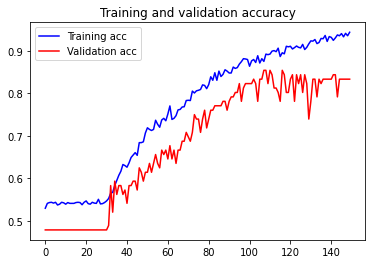

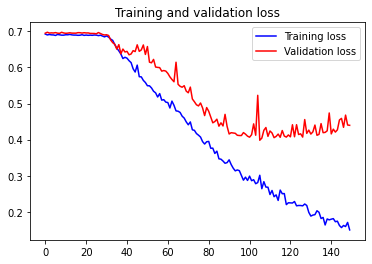

In [ ]:
# loss and accuracy curves.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()



In [ ]:
%cd "/content/orcaal-research/src/preprocessing_script"

/content/orcaal-research/src/preprocessing_script


In [ ]:
!python preprocess.py --tsv_path "/content/OrcasoundLab09272017_Test/test.tsv" --files_dir "/content/OrcasoundLab09272017_Test/wav/" --output_dir "/content/test/" --call_time 3 --melspectrogram --pcen --wavelet

/usr/local/lib/python3.6/dist-packages/numba/errors.py:137: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)
The mean of the call duration is 1.7622367544356434


In [ ]:


from sklearn.metrics import confusion_matrix
import numpy as np


test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    "/content/test_dataset",
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
predictions[predictions<=0.5] = 0
predictions[predictions>0.5] = 1

predicted_classes = (predictions).astype(np.int)

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

cm = confusion_matrix(true_classes, predicted_classes)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))



Found 202 images belonging to 2 classes.
              precision    recall  f1-score   support

       calls       0.82      0.84      0.83       101
    no_calls       0.84      0.81      0.82       101

    accuracy                           0.83       202
   macro avg       0.83      0.83      0.83       202
weighted avg       0.83      0.83      0.83       202

[[85 16]
 [19 82]]
acc: 0.8267
sensitivity: 0.8416
specificity: 0.8119


In [ ]:
!aws --no-sign-request s3 cp s3://acoustic-sandbox/labeled-data/detection/test/OS_SVeirs_07_05_2019_08_24_00.tar.gz /content/nfs/

download: s3://acoustic-sandbox/labeled-data/detection/test/OS_SVeirs_07_05_2019_08_24_00.tar.gz to ../../../nfs/OS_SVeirs_07_05_2019_08_24_00.tar.gz


In [ ]:
%cd /content/nfs

/content/nfs


In [ ]:
!tar -xzf /content/nfs/OS_SVeirs_07_05_2019_08_24_00.tar.gz 


In [ ]:
!pwd

/content/nfs


In [ ]:
!python /content/orcaal-research/src/preprocessing_script/preprocess.py --tsv_path "/content/nfs/test_19.tsv" --files_dir "/content/nfs/test_data/wav" --output_dir "/content/test_2019/" --call_time 3 --melspectrogram --pcen --wavelet

/usr/local/lib/python3.6/dist-packages/numba/errors.py:137: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)
The mean of the call duration is 1.383497131931169


In [ ]:


from sklearn.metrics import confusion_matrix
import numpy as np


test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    "/content/test2019",
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
predictions[predictions<=0.5] = 0
predictions[predictions>0.5] = 1

predicted_classes = (predictions).astype(np.int)

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

cm = confusion_matrix(true_classes, predicted_classes)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))



Found 1046 images belonging to 2 classes.
              precision    recall  f1-score   support

       calls       0.80      0.84      0.82       523
    no_calls       0.83      0.79      0.81       523

    accuracy                           0.82      1046
   macro avg       0.82      0.82      0.82      1046
weighted avg       0.82      0.82      0.82      1046

[[441  82]
 [111 412]]
acc: 0.8155
sensitivity: 0.8432
specificity: 0.7878


In [ ]:
!python /content/statistics.py -m /content/srkw_with_ships.h5 -c /content/test2019

2020-09-05 13:27:22.103519: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Found 1046 images belonging to 2 classes.
2020-09-05 13:27:24.063661: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-05 13:27:24.067176: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-05 13:27:24.067625: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-09-05 13:27:24.067669: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-05 13:27:24.069131: I t

In [ ]:
!pwd

/content/nfs


In [ ]:

%matplotlib inline
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
import logging
import argparse
import random
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import tensorflow as tf
import matplotlib
matplotlib.use('Agg')

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


def plot_roc_curve(test_path,
                   model_path,
                   predictions,
                   true_classes,
                   randomlist):
    """ Plot the ROC curve

    Args:
        test_path: The path to the test directory
        model_path: The path to the model
        predictions: The predictions on the test dataset predicted by the model
        true_classes: The true labels of the test set
        randomlist: A numpy array with random integers consisting either 0 or 1

    Returns:
            None
    """
    ns_probs = randomlist
    lr_probs = predictions[:, 0]
    ns_auc = roc_auc_score(true_classes, ns_probs)
    lr_auc = roc_auc_score(true_classes, lr_probs)
    print('Random Classifier: ROC AUC=%.3f' % (ns_auc))
    print('CNN Classifier: ROC AUC=%.3f' % (lr_auc))
    ns_fpr, ns_tpr, _ = roc_curve(true_classes, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(true_classes, lr_probs)
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random_Classifier')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='CNN_Classifier')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.legend()
    pyplot.show()
    pyplot.savefig('ROC_BOAT.png')



Found 1046 images belonging to 2 classes.
Random Classifier: ROC AUC=0.490
CNN Classifier: ROC AUC=0.905


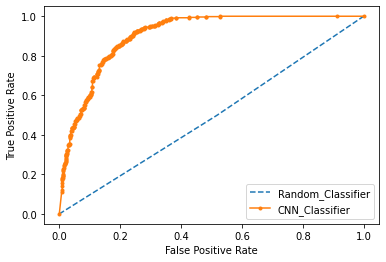

In [ ]:
model_path = "/content/srkw_with_ships.h5"
test_path = "/content/test2019/"
img_width, img_height = 614, 623

test_datagen = ImageDataGenerator(rescale=1. / 55)
test_data_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(img_width, img_height),
        batch_size=32,
        shuffle=False)

true_classes = test_data_generator.classes
    # generate  class dataset

randomlist = []
for j in range(1046):
    randomlist.append(random.randint(0, 1))

model = tf.keras.models.load_model(model_path)
predictions = model.predict_proba(test_data_generator)


plot_roc_curve(model_path, test_path, predictions, true_classes, randomlist)


In [ ]:
for filename in os.listdir("/content/test_dataset/calls/"):
        shutil.move(os.path.join("/content/test_dataset/calls/", filename), "/content/test2019/calls/")

Error: ignored

In [ ]:
%cd /content/test_dataset/no_calls/

/content/test_dataset/no_calls


In [ ]:
for filename in os.listdir("/content/test_dataset/calls/"):
    os.rename(filename, filename[4:])


In [ ]:
for filename in os.listdir("/content/test_dataset/no_calls/"):
    os.rename(filename, filename[4:])


In [ ]:
for filename in os.listdir("/content/test_dataset/calls/"):
        shutil.move(os.path.join("/content/test_dataset/calls/", filename), "/content/test2019/calls/")

In [ ]:
for filename in os.listdir("/content/test_dataset/no_calls/"):
        shutil.move(os.path.join("/content/test_dataset/no_calls/", filename), "/content/test2019/no_calls/")

In [ ]:


from sklearn.metrics import confusion_matrix
import numpy as np

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_data_generator = test_datagen.flow_from_directory(
    "/content/test2019",
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
predictions[predictions<=0.5] = 0
predictions[predictions>0.5] = 1

predicted_classes = (predictions).astype(np.int)

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

cm = confusion_matrix(true_classes, predicted_classes)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))



Found 1248 images belonging to 2 classes.
              precision    recall  f1-score   support

       calls       0.87      0.78      0.83       624
    no_calls       0.80      0.89      0.84       624

    accuracy                           0.83      1248
   macro avg       0.84      0.83      0.83      1248
weighted avg       0.84      0.83      0.83      1248

[[489 135]
 [ 71 553]]
acc: 0.8349
sensitivity: 0.7837
specificity: 0.8862


Found 1248 images belonging to 2 classes.
Random Classifier: ROC AUC=0.521
CNN Classifier: ROC AUC=0.906


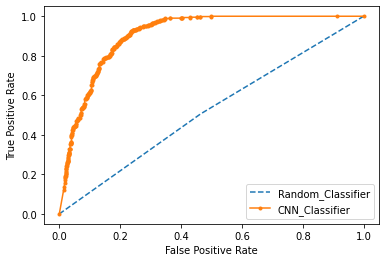

In [ ]:
model_path = "/content/srkw_with_ships.h5"
test_path = "/content/test2019/"
img_width, img_height = 614, 623

test_datagen = ImageDataGenerator(rescale=1. / 55)
test_data_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(img_width, img_height),
        batch_size=32,
        shuffle=False)

true_classes = test_data_generator.classes
    # generate  class dataset

randomlist = []
for j in range(1248):
    randomlist.append(random.randint(0, 1))

model = tf.keras.models.load_model(model_path)
predictions = model.predict_proba(test_data_generator)


plot_roc_curve(model_path, test_path, predictions, true_classes, randomlist)
